In [2]:
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalMaxPool2D, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensordash.tensordash import Tensordash
import matplotlib.pyplot as plt

In [3]:
config=tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
session=tf.compat.v1.InteractiveSession(config=config)

In [4]:
X = np.load("X.npy")
y = np.load("y.npy")

In [5]:
call = Tensordash(ModelName='Malaria Detection')

In [6]:
model = Sequential()

model.add(Conv2D(32, 3, input_shape=(64,64,1),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256, 3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(512, 3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(GlobalMaxPool2D())
#if using globalmaxpool, remove flatten

#model.add(Flatten())

model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))



model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         2

In [7]:
def scheduler(epoch):
    if epoch<3:
        return 0.001
    else:
        return 0.00001
p = LearningRateScheduler(scheduler)

ch = ModelCheckpoint(filepath='checkpoints/model_{epoch:02d}_{loss:.4f}.hdf5', save_best_only=True, monitor='val_loss', mode="min")

In [8]:
with tf.device("/gpu:0"):
    history = model.fit(X, y,batch_size=16, epochs=6,callbacks=[ch], validation_split=0.1)

Epoch 1/6
1321/1321 [==============================] - 13s 10ms/step - loss: 0.7451 - accuracy: 0.5546 - val_loss: 0.6435 - val_accuracy: 0.7158
Epoch 2/6
1321/1321 [==============================] - 12s 9ms/step - loss: 0.6641 - accuracy: 0.6018 - val_loss: 0.7534 - val_accuracy: 0.2859
Epoch 3/6
1321/1321 [==============================] - 12s 9ms/step - loss: 0.4579 - accuracy: 0.7638 - val_loss: 0.3015 - val_accuracy: 0.9071
Epoch 4/6
1321/1321 [==============================] - 12s 9ms/step - loss: 0.1694 - accuracy: 0.9420 - val_loss: 0.4011 - val_accuracy: 0.8671
Epoch 5/6
1321/1321 [==============================] - 12s 9ms/step - loss: 0.1575 - accuracy: 0.9447 - val_loss: 0.1688 - val_accuracy: 0.9416
Epoch 6/6
1321/1321 [==============================] - 12s 9ms/step - loss: 0.1440 - accuracy: 0.9487 - val_loss: 0.0835 - val_accuracy: 0.9744


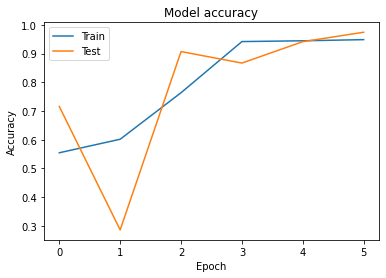

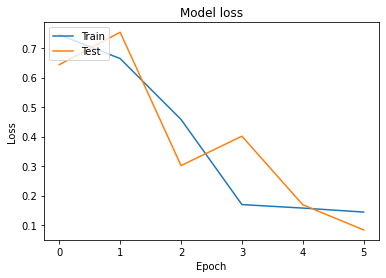

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Accuracy.png')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Loss.png')
plt.show()